In [23]:
# 표준 라이브러리
import sys
from pathlib import Path

# 로컬 모듈
sys.path.append(str(Path.cwd().parent))
from utils import TTest

In [38]:
from scipy.stats import chi2_contingency

In [24]:
import platform
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
else:  # Linux
    plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False

mpl.rcParams['axes.unicode_minus'] = False
# 폰트 개인 경로에 맞춰서 변경
# FONT_DIR = Path("/path/to/fonts")
# font_path = FONT_DIR / 'FREESENTATION-6SEMIBOLD.ttf'
# prop = fm.FontProperties(fname=font_path)

colors = ['#0A4EE4', '#AED6E0', '#9BC4D5', '#758A98', '#3E4E5F']

In [25]:
import pandas as pd
import numpy as np
from scipy import stats

In [26]:
milk = pd.read_csv('../../data/interim/tabmilk.csv')

In [27]:
milk.head()

,농장아이디,개체번호,검정일자,누적착유일(연계),유지방율,유단백,무지고형분,체세포수,MUN,305일유량,...,질병군,비유단계,계절,농장구분,정액코드분류,가격,가격미달,가격구분,분만간격,분만월령
0,21133,20071210010043,2021-03-18,445,6.60,3.28,8.87,274,11.6,15158.0,...,0,수정,1,1,NaN,1062.31,0,1,NaN,144
1,21133,20071210010043,2021-04-28,486,3.64,3.33,8.91,166,11.0,15158.0,...,0,수정,1,1,NaN,1029.40,0,1,NaN,144
2,21133,20071210010043,2021-05-20,508,2.61,3.35,9.14,156,10.8,15158.0,...,0,수정,1,1,NaN,916.10,0,1,NaN,144
3,21133,20071210010043,2021-06-25,544,3.75,3.49,8.99,307,14.1,15158.0,...,0,수정,2,1,NaN,1036.56,0,1,NaN,144
4,21133,20071210010043,2021-07-07,556,3.68,3.74,9.31,34,16.2,15158.0,...,0,수정,2,1,NaN,1039.70,0,1,NaN,144


In [28]:
ttest = TTest()

In [29]:
milk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40264 entries, 0 to 40263
Data columns (total 38 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   농장아이디        40264 non-null  int64  
 1   개체번호         40264 non-null  int64  
 2   검정일자         40264 non-null  object 
 3   누적착유일(연계)    40264 non-null  int64  
 4   유지방율         40264 non-null  float64
 5   유단백          40264 non-null  float64
 6   무지고형분        40264 non-null  float64
 7   체세포수         40264 non-null  int64  
 8   MUN          40264 non-null  float64
 9   305일유량       31766 non-null  float64
 10  305일유지량      40264 non-null  float64
 11  305일유단백      40264 non-null  float64
 12  305일무지고형분    31766 non-null  float64
 13  전산차비유지속성     17618 non-null  float64
 14  전산차건유전유량     24721 non-null  float64
 15  출생일자         40264 non-null  object 
 16  산차           40264 non-null  int64  
 17  최근분만일(연계)    40264 non-null  object 
 18  최근건유일(연계)    16866 non-null  object 
 19  농후사료

In [30]:
milk_0 = milk[milk['가격미달'] == 0]
milk_1 = milk[milk['가격미달'] == 1]

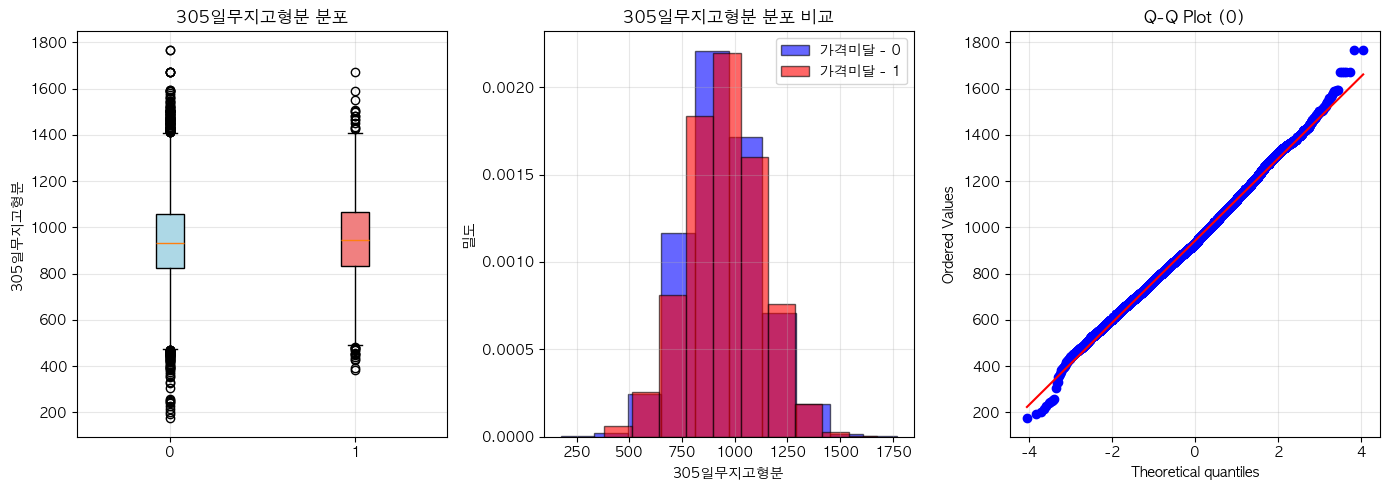


[등분산성 검정]
----------------------------------------
0.716392205635253
Levene's test p-value: 0.7164

[데이터 정규성 검정] n=28263
----------------------------------------
왜도(Skewness): 0.172
첨도(Kurtosis): 0.088
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))

[데이터 정규성 검정] n=3503
----------------------------------------
왜도(Skewness): -0.002
첨도(Kurtosis): 0.088
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))

[가설검정]
----------------------------------------
H₀: μ₀ = μ₁ (두 클래스의 평균이 같다)
H₁: μ₀ ≠ μ₁ (두 클래스의 평균이 다르다)
유의수준: α = 0.05

Student's t-test 결과:
t = -2.8790, p = 0.0040
Cohen's d = -0.052 (매우 작은 효과)

[결론]
✅ p-value(0.0040) < 0.05 → 귀무가설 기각
   두 클래스에 유의한 차이가 있음


{'test_name': "Student's t-test",
 'statistic': np.float64(-2.8790304902163246),
 'p_value': np.float64(0.003991660412565277),
 'effect_size': np.float64(-0.05166135370496828),
 'effect_interpretation': '매우 작은 효과',
 'conclusion': '✅ p-value(0.0040) < 0.05 → 귀무가설 기각\n   두 클래스에 유의한 차이가 있음',
 'metadata': None}

In [31]:
result = ttest.execute(milk_0['305일무지고형분'].dropna(), milk_1['305일무지고형분'].dropna(), '가격미달', '305일무지고형분')
result.to_dict()

In [32]:
# milk['출생년도'].value_counts()

In [36]:
def cramers_v(chi2_stat, n, r, c):
    """
    Cramér's V 효과 크기 계산
    
    카이제곱 검정의 효과 크기를 측정하는 지표로, 두 범주형 변수 간
    연관성의 강도를 0~1 사이 값으로 표현합니다.
    
    Parameters
    ----------
    chi2_stat : float
        카이제곱 통계량 (χ²)
    n : int
        전체 표본 수 (분할표의 총합)
    r : int
        행(row)의 개수
    c : int
        열(column)의 개수
    
    Returns
    -------
    float
        Cramér's V 값 (0~1 사이)
        - 0에 가까울수록: 독립적 (연관성 없음)
        - 1에 가까울수록: 강한 연관성
    """
    return np.sqrt(chi2_stat / (n * min(r-1, c-1)))


def interpret_cramers_v(v):
    """
    Cramér's V 값 해석
    
    Parameters
    ----------
    v : float
        Cramér's V 값 (0~1)
    
    Returns
    -------
    str
        연관성 강도 해석
        
    """
    if v < 0.1:
        return "매우 약한 관계"
    elif v < 0.3:
        return "약한 관계"
    elif v < 0.5:
        return "중간 관계"
    else:
        return "강한 관계"


def check_expected_frequencies(contingency_table):
    """
    카이제곱 검정의 기대빈도 가정 확인
    
    카이제곱 검정을 수행하기 전에 기대빈도가 충분한지 검사합니다.
    기대빈도가 너무 작으면 카이제곱 검정의 정확도가 떨어집니다.
    
    Parameters
    ----------
    contingency_table : array-like
        분할표 (관측 빈도)
    
    Returns
    -------
    bool
        카이제곱 검정 사용 가능 여부
        - True: 카이제곱 검정 사용 가능
        - False: Fisher's exact test 권장
    
    검정 기준
    ---------
    1. 모든 기대빈도 ≥ 5 (이상적)
    2. 기대빈도 < 5인 셀이 전체의 20% 이하 (허용 가능)
    
    Notes
    -----
    - 2×2 분할표에서 기대빈도 < 5인 경우: Fisher's exact test 필수
    - 큰 분할표에서 일부 셀만 < 5: 카이제곱 검정 여전히 사용 가능
    """
    # 카이제곱 검정으로 기대빈도 계산
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
    
    print("\n[기대빈도 확인]")
    print("-"*40)
    
    # -------------------------------------------------------------------------
    # 1. 최소 기대빈도 확인
    # -------------------------------------------------------------------------
    min_expected = expected.min()
    print(f"최소 기대빈도: {min_expected:.2f}")
    
    # -------------------------------------------------------------------------
    # 2. 기대빈도 < 5인 셀의 비율 계산
    # -------------------------------------------------------------------------
    cells_below_5 = (expected < 5).sum()  # 5 미만인 셀 개수
    total_cells = expected.size  # 전체 셀 개수
    percent_below_5 = (cells_below_5 / total_cells) * 100
    
    print(f"5 미만 셀: {cells_below_5}/{total_cells} ({percent_below_5:.1f}%)")
    
    # -------------------------------------------------------------------------
    # 3. 카이제곱 검정 적합성 판단
    # -------------------------------------------------------------------------
    # 조건: 최소 기대빈도 ≥ 5 AND 5 미만 셀 비율 ≤ 20%
    if min_expected < 5 or percent_below_5 > 20:
        print("⚠️ 주의: Fisher's exact test 사용 권장")
        print("   (기대빈도가 너무 작아 카이제곱 검정 부정확)")
        return False
    else:
        print("✅ 카이제곱검정 사용 가능")
        return True


def standardized_residuals(observed, expected):
    """
    표준화 잔차 계산
    
    각 셀의 관측값과 기대값의 차이를 표준화하여 어느 셀이
    독립성 가정에서 크게 벗어나는지 파악합니다.
    
    Parameters
    ----------
    observed : array-like
        관측 빈도 (분할표)
    expected : array-like
        기대 빈도 (chi2_contingency의 결과)
    
    Returns
    -------
    array
        표준화 잔차 행렬
        
    해석
    ----
    - |잔차| > 2: 해당 셀이 독립성에서 유의하게 벗어남
    - |잔차| > 3: 매우 강한 연관성 (이상치 수준)
    - 양수: 관측값이 기대값보다 큼 (과대 표현)
    - 음수: 관측값이 기대값보다 작음 (과소 표현)
    """
    return (observed - expected) / np.sqrt(expected)

In [40]:
groups = ['산차', '농장구분']

for group in groups:
    df = milk[['가격미달', group]]
    
    # 교차표
    contingency_table = pd.crosstab(df['가격미달'], df[group])

    # 기대빈도 확인
    is_valid = check_expected_frequencies(contingency_table)
    
    # 카이제곱 검정
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    
    n = contingency_table.values.sum()  # 전체 표본 수
    r, c = contingency_table.shape      # 행수, 열수
    v = cramers_v(chi2_stat, n, r, c)
    
    # 기대빈도 테이블
    expected_df = pd.DataFrame(
        expected, 
        index=contingency_table.index,
        columns=contingency_table.columns
    )
    print("\n[기대빈도]")
    display(expected_df.round(2))

    # 표준화 잔차
    std_residuals = standardized_residuals(contingency_table.values, expected)
    residuals_df = pd.DataFrame(
        std_residuals,
        index=contingency_table.index,
        columns=contingency_table.columns
    )
    print("\n[표준화 잔차]")
    display(residuals_df.round(2))
    print("(|잔차| > 2: 유의한 차이, |잔차| > 3: 매우 강한 연관성)")
    
    # 결과 요약
    print("\n[결론]")
    if p_value < 0.05:
        print(f"✅ p-value({p_value:.4f}) < 0.05 → 귀무가설 기각")
        print("   질병군과", group, "은(는) 관련이 있음")
        print(f"   효과 크기: {interpret_cramers_v(v)}")
        
        # 사후분석
        print("\n[사후분석]")
        print("   표준화 잔차 |값| > 2인 셀 해석:")
        for i, row_label in enumerate(contingency_table.index):
            for j, col_label in enumerate(contingency_table.columns):
                if abs(std_residuals[i, j]) > 2:
                    if std_residuals[i, j] > 0:
                        print(f"   • {row_label} - {col_label}: 예상보다 많음 (잔차={std_residuals[i, j]:.2f})")
                    else:
                        print(f"   • {row_label} - {col_label}: 예상보다 적음 (잔차={std_residuals[i, j]:.2f})")
    else:
        print(f"❌ p-value({p_value:.4f}) ≥ 0.05 → 귀무가설 채택")
        print("   질병군과", group, "은(는) 독립적임 (연관 없음)")



[기대빈도 확인]
----------------------------------------
최소 기대빈도: 1.28
5 미만 셀: 1/20 (5.0%)
⚠️ 주의: Fisher's exact test 사용 권장
   (기대빈도가 너무 작아 카이제곱 검정 부정확)

[기대빈도]


산차,1,2,3,4,5,6,7,8,9,10
가격미달,,,,,,,,,,
0,13746.94,9788.24,5775.96,3514.87,1886.03,719.76,326.84,130.38,56.26,10.72
1,1647.06,1172.76,692.04,421.13,225.97,86.24,39.16,15.62,6.74,1.28



[표준화 잔차]


산차,1,2,3,4,5,6,7,8,9,10
가격미달,,,,,,,,,,
0,6.09,1.05,-2.59,-3.76,-4.49,-3.94,-2.7,-2.22,-2.30,-1.75
1,-17.59,-3.03,7.49,10.86,12.97,11.39,7.8,6.42,6.65,5.04


(|잔차| > 2: 유의한 차이, |잔차| > 3: 매우 강한 연관성)

[결론]
✅ p-value(0.0000) < 0.05 → 귀무가설 기각
   질병군과 산차 은(는) 관련이 있음
   효과 크기: 약한 관계

[사후분석]
   표준화 잔차 |값| > 2인 셀 해석:
   • 0 - 1: 예상보다 많음 (잔차=6.09)
   • 0 - 3: 예상보다 적음 (잔차=-2.59)
   • 0 - 4: 예상보다 적음 (잔차=-3.76)
   • 0 - 5: 예상보다 적음 (잔차=-4.49)
   • 0 - 6: 예상보다 적음 (잔차=-3.94)
   • 0 - 7: 예상보다 적음 (잔차=-2.70)
   • 0 - 8: 예상보다 적음 (잔차=-2.22)
   • 0 - 9: 예상보다 적음 (잔차=-2.30)
   • 1 - 1: 예상보다 적음 (잔차=-17.59)
   • 1 - 2: 예상보다 적음 (잔차=-3.03)
   • 1 - 3: 예상보다 많음 (잔차=7.49)
   • 1 - 4: 예상보다 많음 (잔차=10.86)
   • 1 - 5: 예상보다 많음 (잔차=12.97)
   • 1 - 6: 예상보다 많음 (잔차=11.39)
   • 1 - 7: 예상보다 많음 (잔차=7.80)
   • 1 - 8: 예상보다 많음 (잔차=6.42)
   • 1 - 9: 예상보다 많음 (잔차=6.65)
   • 1 - 10: 예상보다 많음 (잔차=5.04)

[기대빈도 확인]
----------------------------------------
최소 기대빈도: 1154.89
5 미만 셀: 0/4 (0.0%)
✅ 카이제곱검정 사용 가능

[기대빈도]


농장구분,0,1
가격미달,,
0,26316.89,9639.11
1,3153.11,1154.89



[표준화 잔차]


농장구분,0,1
가격미달,,
0,-0.19,0.31
1,0.55,-0.91


(|잔차| > 2: 유의한 차이, |잔차| > 3: 매우 강한 연관성)

[결론]
❌ p-value(0.2687) ≥ 0.05 → 귀무가설 채택
   질병군과 농장구분 은(는) 독립적임 (연관 없음)
